<a href="https://colab.research.google.com/github/LiliNemes/Bioinformatics/blob/main/Copy_of_Needleman_Wunsch_Smith_Waterman_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Needleman-Wunsch algorithm compares two arbitrary strings, and optimally under a given scoring scheme, returns the highest scoring alignment between the two.

Lets do a comparison of two gene orthologues for hemoglobin subunit beta, between the human and the mouse versions.
The indivudual mRNA sequences were obtained from NCBI, from
Human: http://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000244734;r=11:5225464-5229395;t=ENST00000335295
Mouse: http://www.ensembl.org/Mus_musculus/Transcript/Summary?db=core;g=ENSMUSG00000073940;r=7:103812524-103813996;t=ENSMUST00000098192

**Disclaimer**: *I was not entirely sure whether I had to determine the aligned strings or just the alignment score, so I developped the function in a way that it also prints the aligned strings. In order for this to be successful I had to comment-out the break in the while loop.*

In [59]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

human_HBB = "ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA"
mouse_HBB = "ATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTCTCTGGCCTGTGGGGAAAGGTGAACGCCGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTTGTCTACCCTTGGACCCAGCGGTACTTTGATAGCTTTGGAGACCTATCCTCTGCCTCTGCTATCATGGGTAATGCCAAAGTGAAGGCCCATGGCAAGAAAGTGATAACTGCCTTTAACGATGGCCTGAATCACTTGGACAGCCTCAAGGGCACCTTTGCCAGCCTCAGTGAGCTCCACTGTGACAAGCTGCATGTGGATCCTGAGAACTTCAGGCTCCTGGGCAATATGATCGTGATTGTGCTGGGCCACCACCTGGGCAAGGATTTCACCCCCGCTGCACAGGCTGCCTTCCAGAAGGTGGTGGCTGGAGTGGCTGCTGCCCTGGCTCACAAGTACCACTAA"


In order to perform alignment, we need to define a scoring function for sequences. A good starting point is to use a score of 1 for a match, -1 for a mismatch and -1 for a gaps

In [60]:
def match_score(a,b):
  if a == b:
    return 1
  else:
    return -1

gap_score = -1

# The developped algorithm:

After coding the Smith-Waterman algorithm I came to the realization that the tracing methods are nearly identical in the two algorithms, so I developped the tracing function in order to avoid code duplication.

In [89]:
#Tracing backwards and adding a letter or '-' to both lists representing the aligned strings for every step.
def tracing(matrix, position, alignment_query, alignment_subject, query, subject, scorefunc):
    #If the best choice is the one diagonal.
    if(matrix[position[0]-1][position[1]-1] + scorefunc(query[position[0]-1], subject[position[1]-1]) == matrix[position]):
      position_new = (position[0]-1, position[1]-1)
      alignment_query.append(query[position[0]-1])
      alignment_subject.append(subject[position[1]-1])
    #if the best choice is the one upwards.
    elif(matrix[position[0]-1, position[1]] + gap_score == matrix[position]):
      position_new = (position[0]-1, position[1])
      alignment_query.append(query[position[0]-1])
      alignment_subject.append("-")
    #If the best choice is the one leftwards.
    else:
      position_new = (position[0], position[1]-1)
      alignment_subject.append(subject[position[1]-1])
      alignment_query.append("-")
    return position_new


In [88]:
def NeedlemanWunsch(query, subject, scorefunc):
  #I had to change the time.clock() funtion to time.time() as python 3 didn't recognize it.
  t0 = time.time()
  nwmatrix = np.zeros((len(query)+1,len(subject)+1))

  # Initialization of the first row and the first column
  nwmatrix[0] = np.arange(0, -len(query) - 1, -1)
  nwmatrix[:, 0] = np.arange(0, -len(subject) - 1, -1)

  #Filling in the table
  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      nwmatrix[q,s] = max(nwmatrix[q-1][s-1] + scorefunc(query[q-1], subject[s-1]), nwmatrix[q-1, s] + gap_score, nwmatrix[q, s-1] + gap_score)

  #The traceback starts from the bottom right corner of the matrix, (e.g. [len(query)-1, len(subject)-1])
  #And proceeds up/left to the highest value, any choice is valid on equal scores
  traceback_position = (len(query), len(subject))
  #The 2 lists for the aligned strings, currently empty
  alignment_query = []
  alignment_subject = []

  while traceback_position != (0,0):
    traceback_position = tracing(nwmatrix, traceback_position, alignment_query, alignment_subject, query, subject, scorefunc)
    #break #just so our test runs :), but it stops the tracking of the aligned strings.

  alignment_score = nwmatrix[len(query), len(subject)]
  #Reversing the lists representing the aligned strings.
  alignment_query.reverse()
  alignment_subject.reverse()
  print ('Alignment performed in %.3f seconds'%(time.time()-t0))

  #Just for debugging purposes
  print(nwmatrix)
  #The aligned strings as lists.
  print(alignment_query)
  print(alignment_subject)

  #The diagram
  sns.heatmap(nwmatrix)
  plt.show()

  return alignment_score



The total alignment score is also present in the bottom right corner of the matrix.
If the traceback is not required, then often times just returning the score is sufficient

*I tested the algorithm on two smaller sequences, the ones displayed in the excel sheet. I found the algorithm to be correct in this particular case.*

Alignment performed in 0.000 seconds
[[ 0. -1. -2. -3. -4. -5. -6. -7.]
 [-1.  1.  0. -1. -2. -3. -4. -5.]
 [-2.  0.  0.  1.  0. -1. -2. -3.]
 [-3. -1. -1.  0.  2.  1.  0. -1.]
 [-4. -2. -2. -1.  1.  3.  2.  1.]
 [-5. -3. -3. -1.  0.  2.  4.  3.]
 [-6. -4. -2. -2. -1.  1.  3.  3.]
 [-7. -5. -3. -1. -2.  0.  2.  2.]]
['G', '-', 'A', 'T', 'T', 'A', 'C', 'A']
['G', 'C', 'A', 'T', 'T', 'A', '-', 'T']


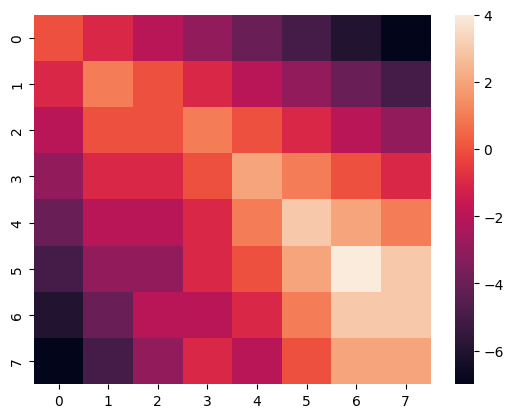

In [90]:
test = NeedlemanWunsch("GATTACA", "GCATTAT", match_score)

Alignment performed in 0.321 seconds
[[   0.   -1.   -2. ... -442. -443. -444.]
 [  -1.    1.    0. ... -440. -441. -442.]
 [  -2.    0.    2. ... -438. -439. -440.]
 ...
 [-442. -440. -438. ...  300.  299.  298.]
 [-443. -441. -439. ...  299.  301.  300.]
 [-444. -442. -440. ...  298.  300.  302.]]
['A', 'T', 'G', 'G', 'T', 'G', 'C', 'A', 'T', 'C', 'T', 'G', 'A', 'C', 'T', 'C', 'C', 'T', 'G', 'A', 'G', 'G', 'A', 'G', 'A', 'A', 'G', 'T', 'C', 'T', 'G', 'C', 'C', 'G', 'T', '-', 'T', 'A', 'C', 'T', 'G', 'C', 'C', 'C', 'T', 'G', 'T', 'G', 'G', 'G', 'G', 'C', 'A', 'A', 'G', 'G', 'T', 'G', 'A', 'A', 'C', 'G', 'T', 'G', 'G', 'A', 'T', 'G', 'A', 'A', 'G', 'T', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'A', 'G', 'G', 'C', 'C', 'C', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'T', 'A', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'G', 'G', 'T', 'T', 'C', 'T', 'T', 'T', 'G', 'A', 'G', 'T', '-', 'C', 'C', 'T', 'T', 'T'

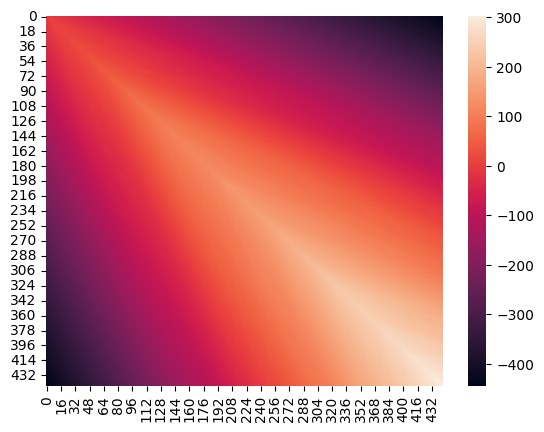

In [91]:
score = NeedlemanWunsch(human_HBB,mouse_HBB,match_score)

Note the time it takes to run your algorithm. I will give extra credit to the fastest implementations. Naturally, you dont have to include the drawing of the diagrams inside the calculation. *It usually takes between 0.320-0.360 seconds.*


Next, try to implement the Smith Waterman Algorithm:

In [92]:
def SmithWaterman(query,subject,scorefunc):
  swmatrix = np.zeros ((len(query) + 1,len(subject) + 1)) #in Smith-Waterman, we only initialize to 0

  highest_score = 0
  highest_score_position = (0, 0)

  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX[NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score, 0]
      #Note that we cannot go below 0!
      swmatrix[q,s] = max(swmatrix[q-1, s-1] + scorefunc(query[q-1], subject[s-1]), swmatrix[q-1, s]+ gap_score, swmatrix[q, s-1] +gap_score, 0)
      if(swmatrix[q, s]>highest_score):
        highest_score_position = (q, s)
        highest_score = swmatrix[q, s]

  alignment_score = highest_score

  #TODO: trace back from the highest scoring cell while score is greater than 0!
  alignment_query = []
  alignment_subject = []
  while swmatrix[highest_score_position] != 0:
    highest_score_position = tracing(swmatrix, highest_score_position, alignment_query, alignment_subject, query, subject, scorefunc)


  alignment_query.reverse()
  alignment_subject.reverse()
  print(swmatrix)
  print(alignment_query)
  print(alignment_subject)

  fig, ax = plt.subplots(figsize=(25,10))
  sns.heatmap(swmatrix)
  plt.show()
  return alignment_score

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 2. 1. 0. 1. 0. 1. 0. 0. 2.]
 [0. 0. 0. 0. 0. 1. 3. 2. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 2. 4. 3. 2. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 1. 3. 5. 4. 3. 2. 1. 1.]
 [0. 0. 2. 1. 0. 0. 0. 2. 4. 6. 5. 4. 3. 2.]
 [0. 1. 1. 3. 2. 1. 0. 1. 3. 5. 7. 6. 5. 4.]
 [0. 0. 0. 2. 2. 1. 2. 1. 2. 4. 6. 6. 5. 4.]
 [0. 0. 0. 1. 1. 1. 2. 3. 2. 3. 5. 5. 5. 4.]]
['G', 'A', 'T', 'T', 'A', 'C', 'A']
['G', 'A', 'T', 'T', 'A', 'C', 'A']


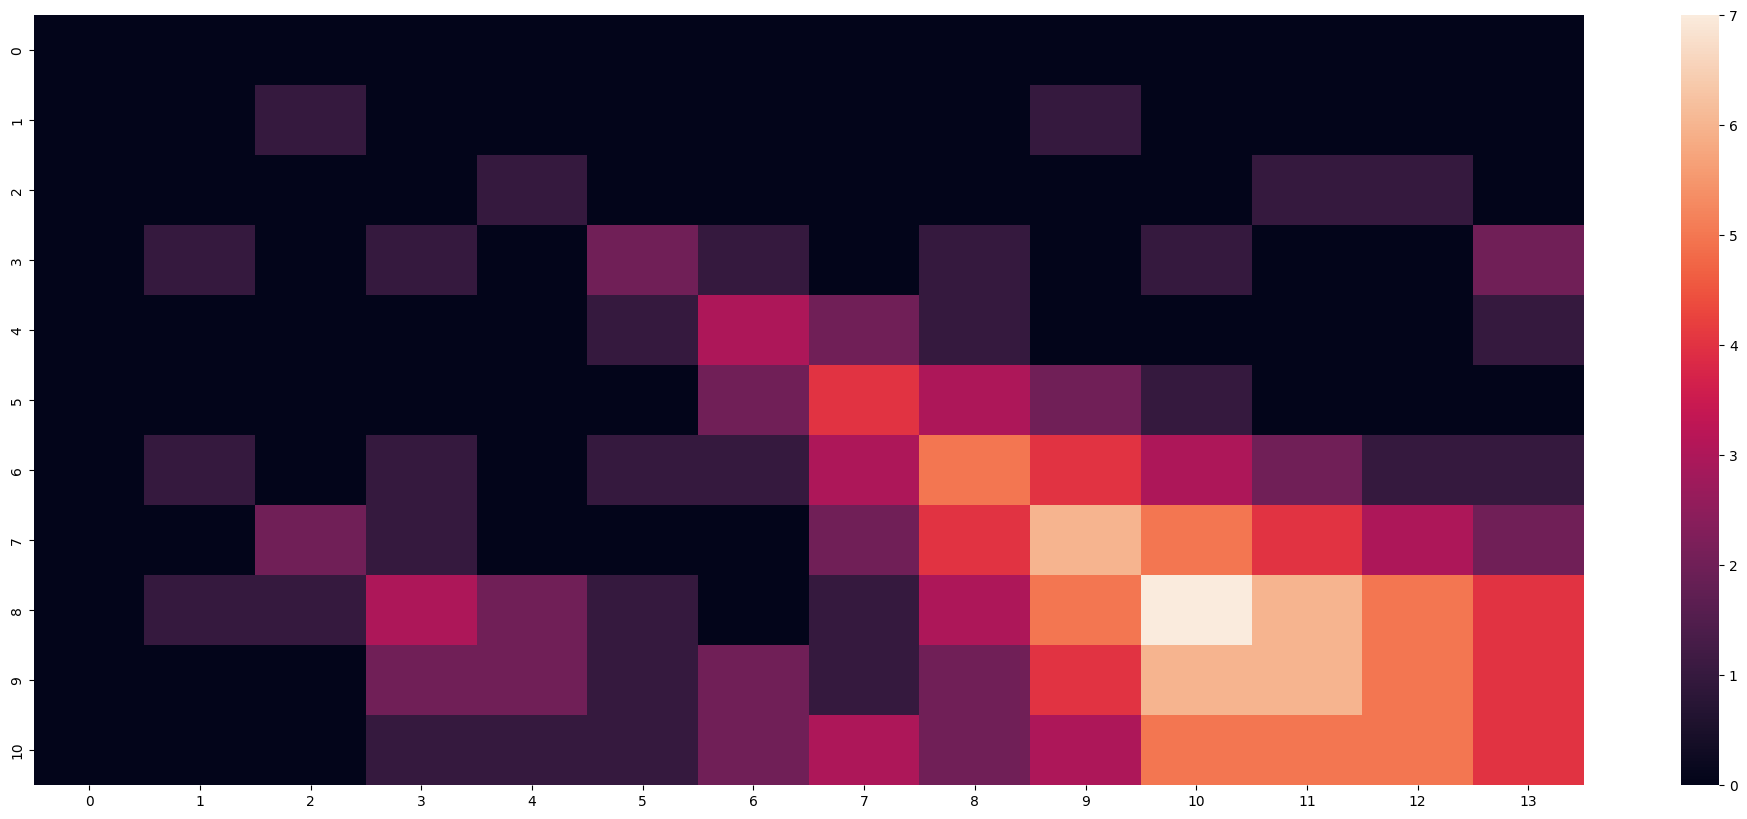

7.0


In [93]:
test = SmithWaterman("CGATTACATT", "ACAGATTACAGGA", match_score)
print(test)

And compare the coding region of human_HBB with the entire mRNA transcript of human_HBB_CDS!

Are there multiple candidate matches? Are there multiple regions of long matches?


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  1.]
 [ 0.  1.  1. ...  0.  0.  0.]
 ...
 [ 0.  1.  1. ... 41. 40. 39.]
 [ 0.  0.  0. ... 41. 42. 41.]
 [ 0.  0.  0. ... 41. 42. 43.]]
['T', 'G', 'G', 'T', 'G', 'C', 'A', 'T', 'C', 'T', '-', 'G', 'A', 'C', 'T', 'C', 'C', 'T', 'G', 'A', 'G', 'G', 'A', 'G', 'A', 'A', 'G', 'T', 'C', '-', 'T', 'G', 'C', 'C', 'G', 'T', 'T', 'A', 'C', 'T', 'G', 'C', 'C', 'C', 'T', 'G', '-', 'T', 'G', 'G', 'G', 'G', 'C', 'A', 'A', 'G', 'G', 'T', 'G', 'A', 'A', 'C', '-', 'G', 'T', 'G', 'G', 'A', 'T', 'G', '-', '-', 'A', 'A', 'G', 'T', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'A', '-', '-', 'G', 'G', 'C', 'C', 'C', 'T', 'G', 'G', 'G', 'C', '-', '-', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'T', 'A', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'G', 'G', 'T', 'T', 'C', 'T', 'T', 'T', 'G', 'A', 'G', 'T', 'C', 'C', 'T', 'T', 'T', 'G', 'G', 'G', 'G', 'A', 'T', 'C', 'T', 'G', 'T', 'C', 'C', 'A', 'C', 'T

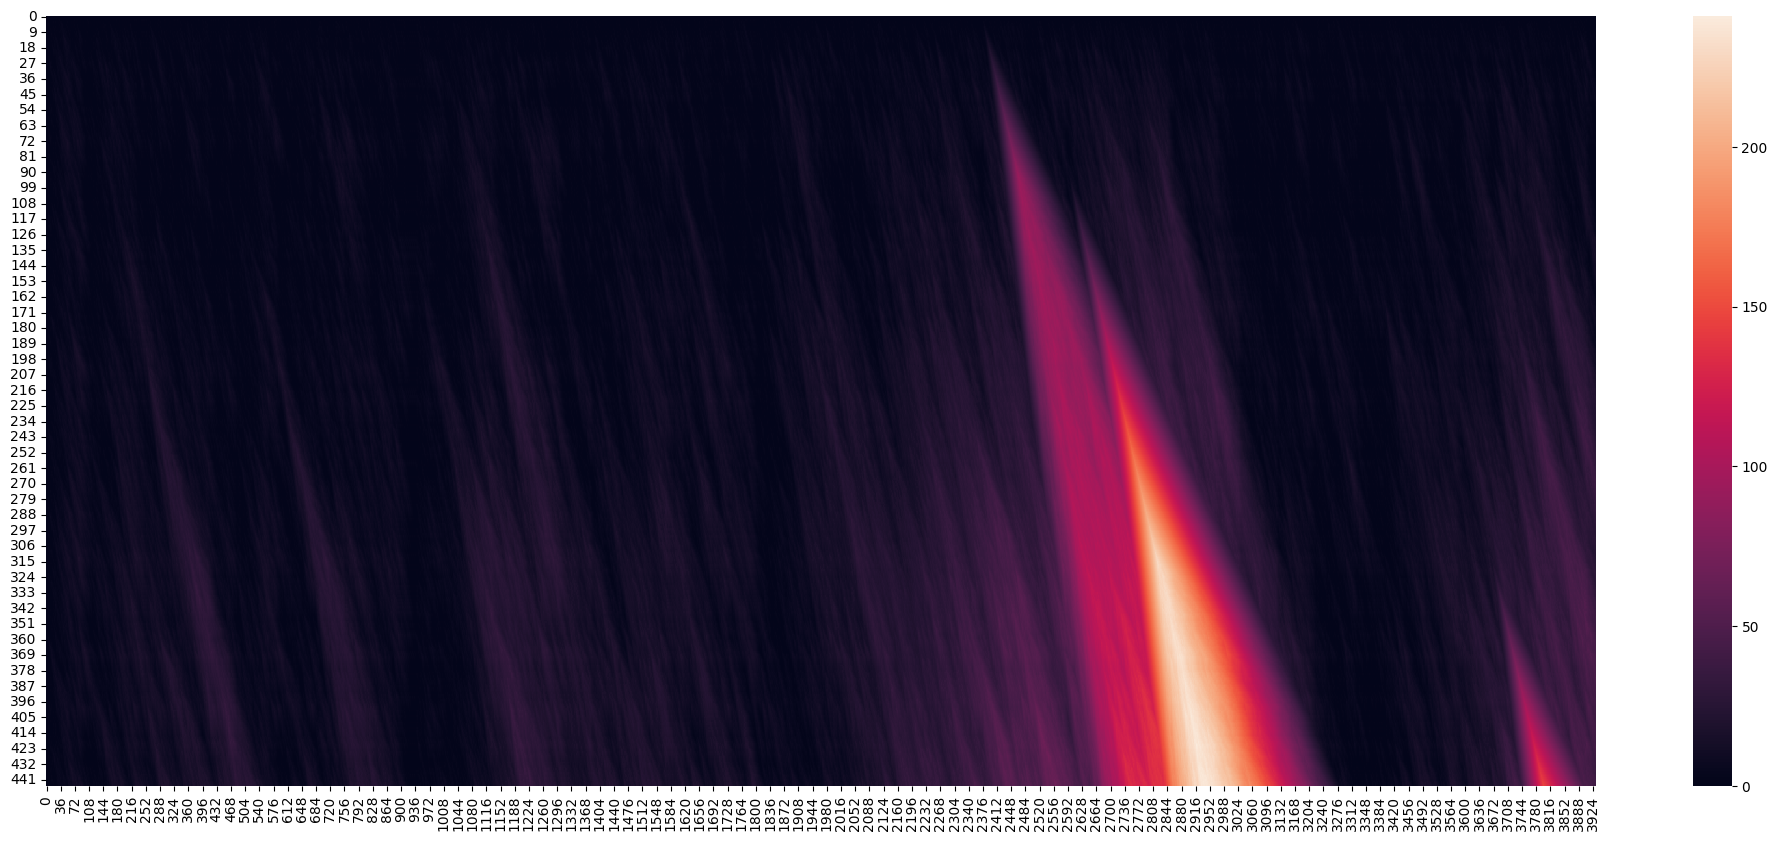

241.0


In [94]:

human_HBB_CDS = "TTGGAAAAGCAACCCCTGCCTTGAAGCCAGGATGATGGTATCTGCAGCAGTTGCCAACACAAGAGAAGGATCCATAGTTCATCATTTAAAAAAGAAAACAAAATAGAAAAAGGAAAACTATTTCTGAGCATAAGAAGTTGTAGGGTAAGTCTTTAAGAAGGTGACAATTTCTGCCAATCAGGATTTCAAAGCTCTTGCTTTGACAATTTTGGTCTTTCAGAATACTATAAATATAACCTATATTATAATTTCATAAAGTCTGTGCATTTTCTTTGACCCAGGATATTTGCAAAAGACATATTCAAACTTCCGCAGAACACTTTATTTCACATATACATGCCTCTTATATCAGGGATGTGAAACAGGGTCTTGAAAACTGTCTAAATCTAAAACAATGCTAATGCAGGTTTAAATTTAATAAAATAAAATCCAAAATCTAACAGCCAAGTCAAATCTGCATGTTTTAACATTTAAAATATTTTAAAGACGTCTTTTCCCAGGATTCAACATGTGAAATCTTTTCTCAGGGATACACGTGTGCCTAGATCCTCATTGCTTTAGTTTTTTACAGAGGAATGAATATAAAAAGAAAATACTTAAATTTTATCCCTCTTACCTCTATAATCATACATAGGCATAATTTTTTAACCTAGGCTCCAGATAGCCATAGAAGAACCAAACACTTTCTGCGTGTGTGAGAATAATCAGAGTGAGATTTTTTCACAAGTACCTGATGAGGGTTGAGACAGGTAGAAAAAGTGAGAGATCTCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAAATTTGTAAATTTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTAAATTTTATTTCATTTTATTGTTTTATTTTATTTTATTTTATTTTATTTTGTGTAATCGTAGTTTCAGAGTGTTAGAGCTGAAAGGAAGAAGTAGGAGAAACATGCAAAGTAAAAGTATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGTAGGGGCAGGATTCAGGATGACTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATGCTTGCTACCTTTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTTTCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGGCGATCACGTTGGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACAAACAAAATATAAAGAGAAATAGGAACTTGAATCAAGGAAATGATTTTAAAACGCAGTATTCTTAGTGGACTAGAGGAAAAAAATAATCTGAGCCAAGTAGAAGACCTTTTCCCCTCCTACCCCTACTTTCTAAGTCACAGAGGCTTTTTGTTCCCCCAGACACTCTTGCAGATTAGTCCAGGCAGAAACAGTTAGATGTCCCCAGTTAACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTTTGACTGCATTAAGAGGTCTCTAGTTTTTTATCTCTTGTTTCCCAAAACCTAATAAGTAACTAATGCACAGAGCACATTGATTTGTATTTATTCTATTTTTAGACATAATTTATTAGCATGCATGAGCAAATTAAGAAAAACAACAACAAATGAATGCATATATATGTATATGTATGTGTGTATATATACACACATATATATATATATTTTTTCTTTTCTTACCAGAAGGTTTTAATCCAAATAAGGAGAAGATATGCTTAGAACCGAGGTAGAGTTTTCATCCATTCTGTCCTGTAAGTATTTTGCATATTCTGGAGACGCAGGAAGAGATCCATCTACATATCCCAAAGCTGAATTATGGTAGACAAAACTCTTCCACTTTTAGTGCATCAACTTCTTATTTGTGTAATAAGAAAATTGGGAAAACGATCTTCAATATGCTTACCAAGCTGTGATTCCAAATATTACGTAAATACACTTGCAAAGGAGGATGTTTTTAGTAGCAATTTGTACTGATGGTATGGGGCCAAGAGATATATCTTAGAGGGAGGGCTGAGGGTTTGAAGTCCAACTCCTAAGCCAGTGCCAGAAGAGCCAAGGACAGGTACGGCTGTCATCACTTAGACCTCACCCTGTGGAGCCACACCCTAGGGTTGGCCAATCTACTCCCAGGAGCAGGGAGGGCAGGAGCCAGGGCTGGGCATAAAAGTCAGGGCAGAGCCATCTATTGCTTACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAGGGTAATTTTGCATTTGTAATTTTAAAAAATGCTTTCTTCTTTTAATATACTTTTTTGTTTATCTTATTTCTAATACTTTCCCTAATCTCTTTCTTTCAGGGCAATAATGATACAATGTATCATGCCTCTTTGCACCATTCTAAAGAATAACAGTGATAATTTCTGGGTTAAGGCAATAGCAATATCTCTGCATATAAATATTTCTGCATATAAATTGTAACTGATGTAAGAGGTTTCATATTGCTAATAGCAGCTACAATCCAGCTACCATTCTGCTTTTATTTTATGGTTGGGATAAGGCTGGATTATTCTGAGTCCAAGCTAGGCCCTTTTGCTAATCATGTTCATACCTCTTATCTTCCTCCCACAGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA"

score = SmithWaterman(human_HBB,human_HBB_CDS,match_score)
print(score)


Change the scoring function to have higher penalties for both gaps and mismatches. Align human_HBB with human_HBB_CDS again with the new scores using the SW algorithm. How did this change our results?

The alignment score is lower and there are significantly less brighter areas in the diagram, meaning that the majority of the matrix is consisted of numbers closer or equal to zero. This is because of the higher penalties for mismatches and gaps, as a match is only one point, and a mismatch/gap is -10, it is easy to get a 0 score if there are no sequences of matches preceding the element in question.


In [95]:
#Difining a scoring scheme with higher penalties for gaps and mismatches.
def higher_penalty_scoring(a, b):
  if(a==b):
    return 1
  else:
    return -10

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 2.]]
['A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'T', 'A', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'G', 'G', 'T', 'T', 'C', 'T', 'T', 'T', 'G', 'A', 'G', 'T', 'C', 'C', 'T', 'T', 'T', 'G', 'G', 'G', 'G', 'A', 'T', 'C', 'T', 'G', 'T', 'C', 'C', 'A', 'C', 'T', 'C', 'C', 'T', 'G', 'A', 'T', 'G', 'C', 'T', 'G', 'T', 'T', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'G', 'T', 'G', 'A', 'A', 'G', 'G', 'C', 'T', 'C', 'A', 'T', 'G', 'G', 'C', 'A', 'A', 'G', 'A', 'A', 'A', 'G', 'T', 'G', 'C', 'T', 'C', 'G', 'G', 'T', 'G', 'C', 'C', 'T', 'T', 'T', 'A', 'G', 'T', 'G', 'A', 'T', 'G', 'G', 'C', 'C', 'T', 'G', 'G', 'C', 'T', 'C', 'A', 'C', 'C', 'T', 'G', 'G', 'A', 'C', 'A', 'A', 'C', 'C', 'T', 'C', 'A', 'A', 'G', 'G', 'G', 'C', 'A', 'C', 'C', 'T', 'T', 'T', 'G'

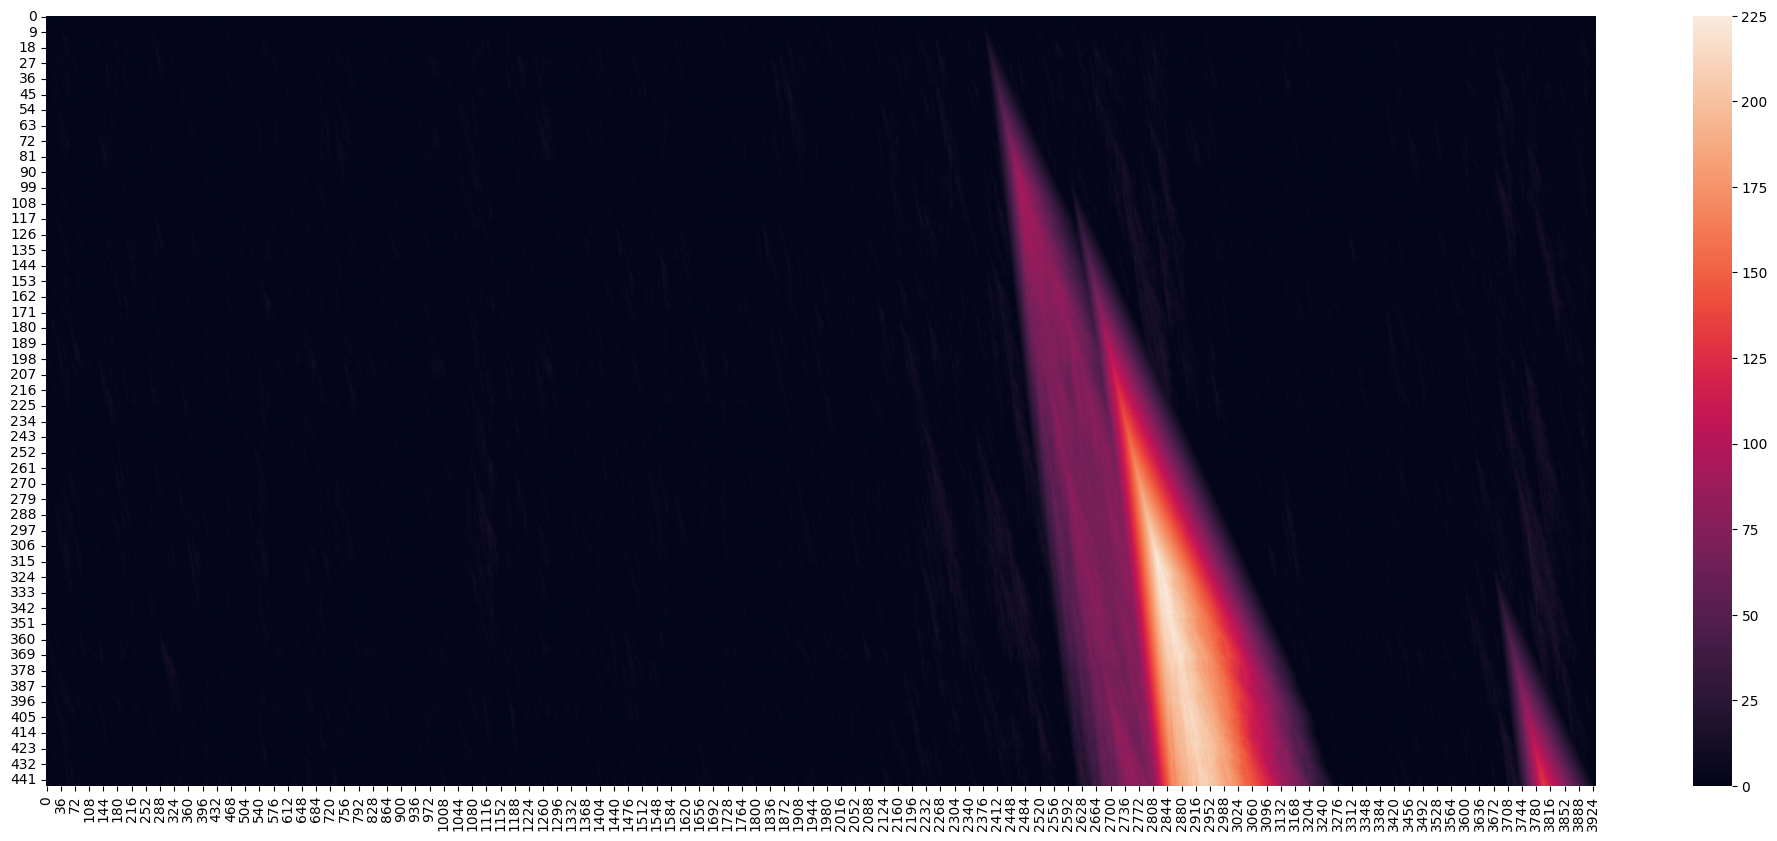

225.0


In [96]:
score_penalties = SmithWaterman(human_HBB, human_HBB_CDS, higher_penalty_scoring)
print(score_penalties)

Try defining an even better scoring function, one that adds higher penalties to purine/pyrimidine mismatches, as those are evolutionarily less likely, and compare the human and mouse HBB genes.

Finally, dont forget to share this notebook with me, so I can take a look at your results (psarkozy@mit.bme.hu)

In [97]:
def purine_pirimidine_mismatch_scoring(a, b):
  #The x and y axes of this matrix are the 4 bases in order: C T A G. The diagonal represents the matching score of 1.
  # The mismatch penalties vary. In case of the mismatch happenning between two purines (A, G) or two pirimidines (C, T) the penalty is 0.
  # In case of a mismatch between a purine and a pyrimidine the penalty is -1.
  scoring_matrix =np.array([[2, 1, -1, -1],
                            [1, 2, -1, -1],
                            [-1, -1, 2, 1],
                            [-1, -1, 1, 2]])
  list_of_bases = ["C", "T", "G", "A"]
  coordinate_x = 0
  coordinate_y = 0
  for i in list_of_bases:
    if(a==i):
      coordinate_x=list_of_bases.index(i)
    if(b==i):
      coordinate_y=list_of_bases.index(i)
  return scoring_matrix[coordinate_y, coordinate_x]

gap_score=-1


Alignment performed in 0.001 seconds
[[ 0. -1. -2. -3. -4. -5. -6. -7.]
 [-1.  2.  1.  0. -1. -2. -3. -4.]
 [-2.  1.  1.  3.  2.  1.  0. -1.]
 [-3.  0.  2.  2.  5.  4.  3.  2.]
 [-4. -1.  1.  1.  4.  7.  6.  5.]
 [-5. -2.  0.  3.  3.  6.  9.  8.]
 [-6. -3.  0.  2.  4.  5.  8. 10.]
 [-7. -4. -1.  2.  3.  4.  7.  9.]]
['G', '-', 'A', 'T', 'T', 'A', 'C', 'A']
['G', 'C', 'A', 'T', 'T', 'A', 'T', '-']


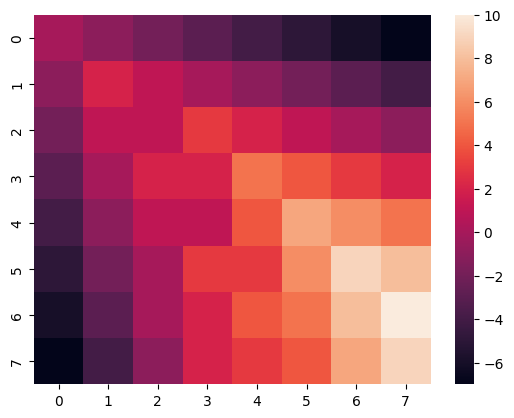

In [98]:
score_purine_pyrimidine_test = NeedlemanWunsch("GATTACA", "GCATTAT", purine_pirimidine_mismatch_scoring)
print(score_purine_pyrimidine_test)

Alignment performed in 1.102 seconds
[[   0.   -1.   -2. ... -442. -443. -444.]
 [  -1.    2.    1. ... -439. -440. -441.]
 [  -2.    1.    4. ... -436. -437. -438.]
 ...
 [-442. -439. -436. ...  739.  738.  737.]
 [-443. -440. -437. ...  738.  741.  740.]
 [-444. -441. -438. ...  737.  740.  743.]]
['A', 'T', 'G', 'G', 'T', 'G', 'C', 'A', 'T', 'C', 'T', 'G', 'A', 'C', 'T', '-', '-', 'C', '-', 'C', 'T', 'G', 'A', 'G', 'G', 'A', 'G', 'A', 'A', 'G', 'T', 'C', 'T', 'G', 'C', 'C', 'G', 'T', 'T', 'A', 'C', 'T', 'G', 'C', 'C', 'C', 'T', 'G', 'T', 'G', 'G', 'G', 'G', 'C', 'A', 'A', 'G', 'G', 'T', 'G', 'A', 'A', 'C', 'G', 'T', 'G', 'G', 'A', 'T', 'G', 'A', 'A', 'G', 'T', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'A', 'G', 'G', 'C', 'C', 'C', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'T', 'A', 'C', 'C', 'C', 'T', 'T', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'G', 'G', 'T', 'T', 'C', 'T', 'T', 'T', 'G', 'A', 'G', 'T', '-', 'C', 'C', 'T'

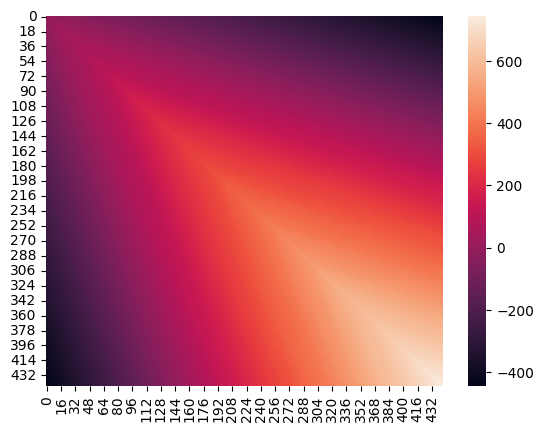

743.0


In [100]:
score_purine_pyrimidine = NeedlemanWunsch(human_HBB, mouse_HBB, purine_pirimidine_mismatch_scoring)
print(score_purine_pyrimidine)